In [15]:
# pip install wfdb matplotlib numpy

In [16]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Configuration ---
# Adjust this path based on your Kaggle dataset location
# It should point to the directory CONTAINING Person_01, Person_02, etc.
base_data_dir = '/kaggle/input/ecg-sample/sample/' 

subjects_to_analyze = ['Person_01', 'Person_02', 'Person_03']
# Let's look at the first few records for each subject
records_to_analyze_per_subject = ['rec_1', 'rec_2', 'rec_3'] 

# --- Function to Load and Get Info ---
def load_ecg_record(subject_id, record_name, base_dir):
    """Loads a specific ECG record using wfdb."""
    record_path_base = os.path.join(base_dir, subject_id, record_name)
    print(f"Attempting to load: {record_path_base}")
    
    try:
        # Use rdrecord to read both header (.hea) and signal (.dat)
        record = wfdb.rdrecord(record_path_base) 
        
        # Get signal data (p_signal reads data in physical units, mV)
        # Column 0 is raw, Column 1 is filtered based on description
        signal_raw = record.p_signal[:, 0]
        signal_filtered = record.p_signal[:, 1]
        
        # Get sampling frequency
        fs = record.fs
        
        # Get signal names/labels
        signal_labels = record.sig_name
        
        # Get comments from header
        comments = record.comments
        
        print(f"Successfully loaded {subject_id}/{record_name}:")
        print(f"  Sampling Frequency (fs): {fs} Hz")
        print(f"  Number of samples: {record.sig_len}")
        print(f"  Recording duration: {record.sig_len / fs:.2f} seconds")
        print(f"  Number of signals: {record.n_sig}")
        print(f"  Signal labels: {signal_labels}")
        # print(f"  Header Comments: {comments}") # Uncomment to see age/gender etc.
        
        return record, signal_raw, signal_filtered, fs, signal_labels

    except Exception as e:
        print(f"Error loading {subject_id}/{record_name}: {e}")
        return None, None, None, None, None



--- Processing Subject: Person_01 ---
Attempting to load: /kaggle/input/ecg-sample/sample/Person_01/rec_1
Successfully loaded Person_01/rec_1:
  Sampling Frequency (fs): 500 Hz
  Number of samples: 10000
  Recording duration: 20.00 seconds
  Number of signals: 2
  Signal labels: ['ECG I', 'ECG I filtered']
Attempting to load: /kaggle/input/ecg-sample/sample/Person_01/rec_2
Successfully loaded Person_01/rec_2:
  Sampling Frequency (fs): 500 Hz
  Number of samples: 10000
  Recording duration: 20.00 seconds
  Number of signals: 2
  Signal labels: ['ECG I', 'ECG I filtered']
Attempting to load: /kaggle/input/ecg-sample/sample/Person_01/rec_3
Successfully loaded Person_01/rec_3:
  Sampling Frequency (fs): 500 Hz
  Number of samples: 10000
  Recording duration: 20.00 seconds
  Number of signals: 2
  Signal labels: ['ECG I', 'ECG I filtered']


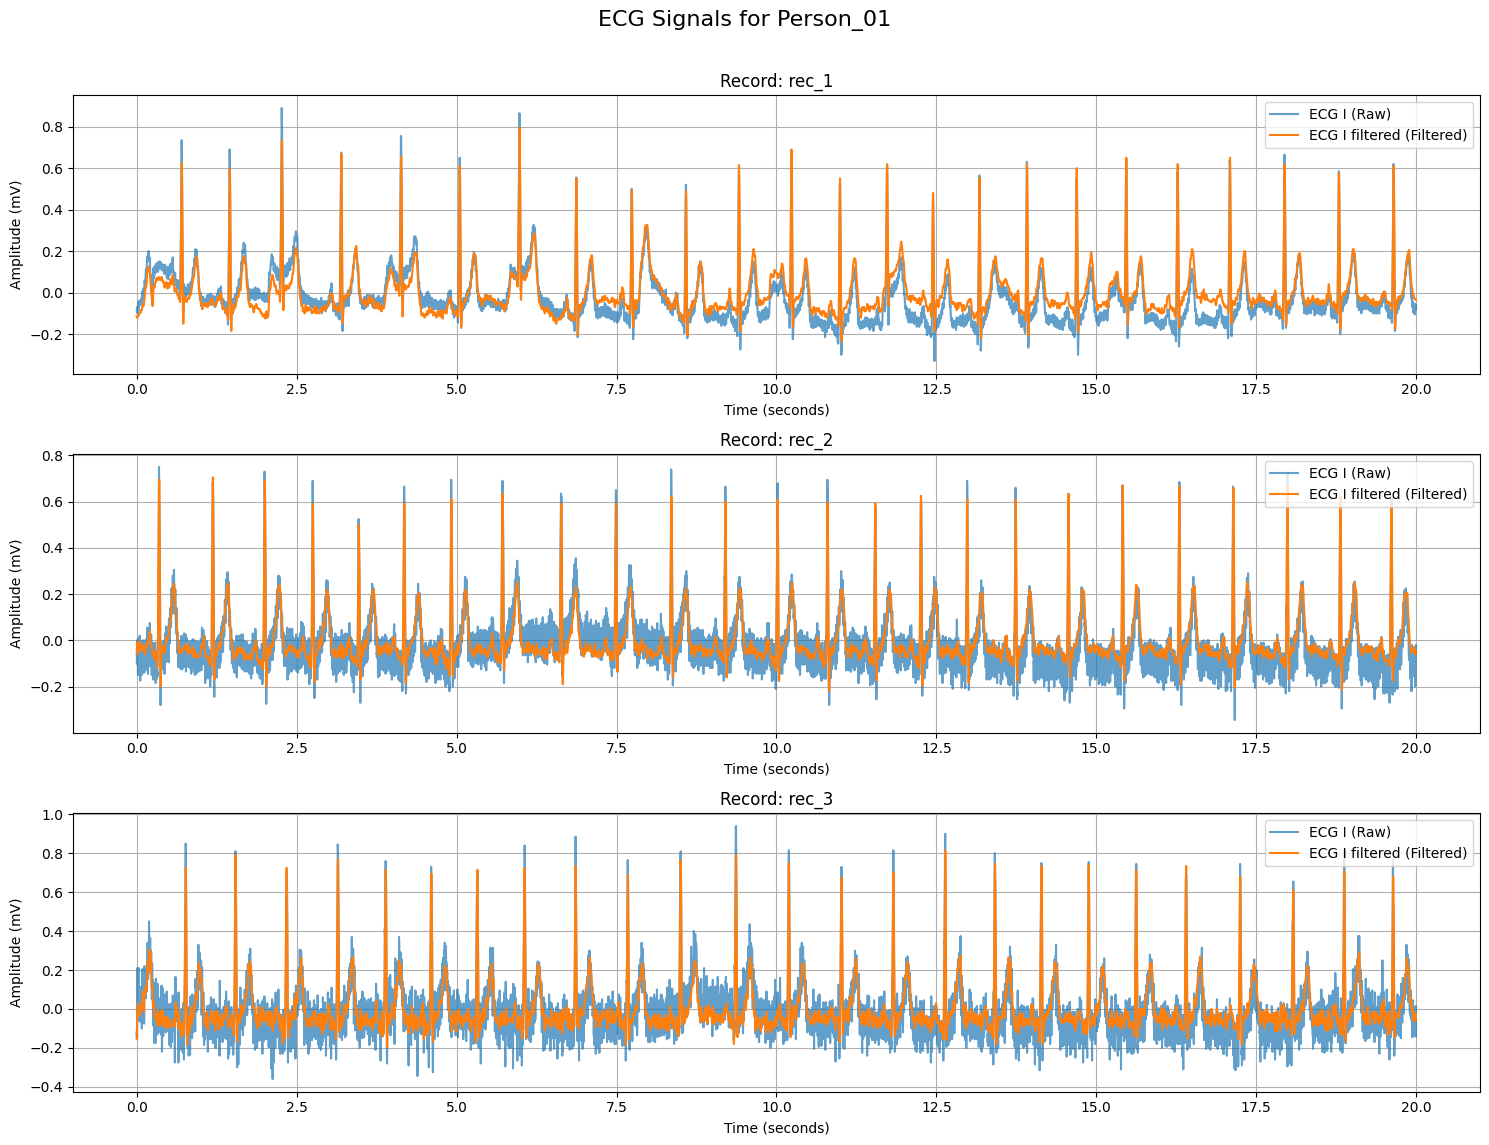


--- Processing Subject: Person_02 ---
Attempting to load: /kaggle/input/ecg-sample/sample/Person_02/rec_1
Successfully loaded Person_02/rec_1:
  Sampling Frequency (fs): 500 Hz
  Number of samples: 10000
  Recording duration: 20.00 seconds
  Number of signals: 2
  Signal labels: ['ECG I', 'ECG I filtered']
Attempting to load: /kaggle/input/ecg-sample/sample/Person_02/rec_2
Successfully loaded Person_02/rec_2:
  Sampling Frequency (fs): 500 Hz
  Number of samples: 10000
  Recording duration: 20.00 seconds
  Number of signals: 2
  Signal labels: ['ECG I', 'ECG I filtered']
Attempting to load: /kaggle/input/ecg-sample/sample/Person_02/rec_3
Successfully loaded Person_02/rec_3:
  Sampling Frequency (fs): 500 Hz
  Number of samples: 10000
  Recording duration: 20.00 seconds
  Number of signals: 2
  Signal labels: ['ECG I', 'ECG I filtered']


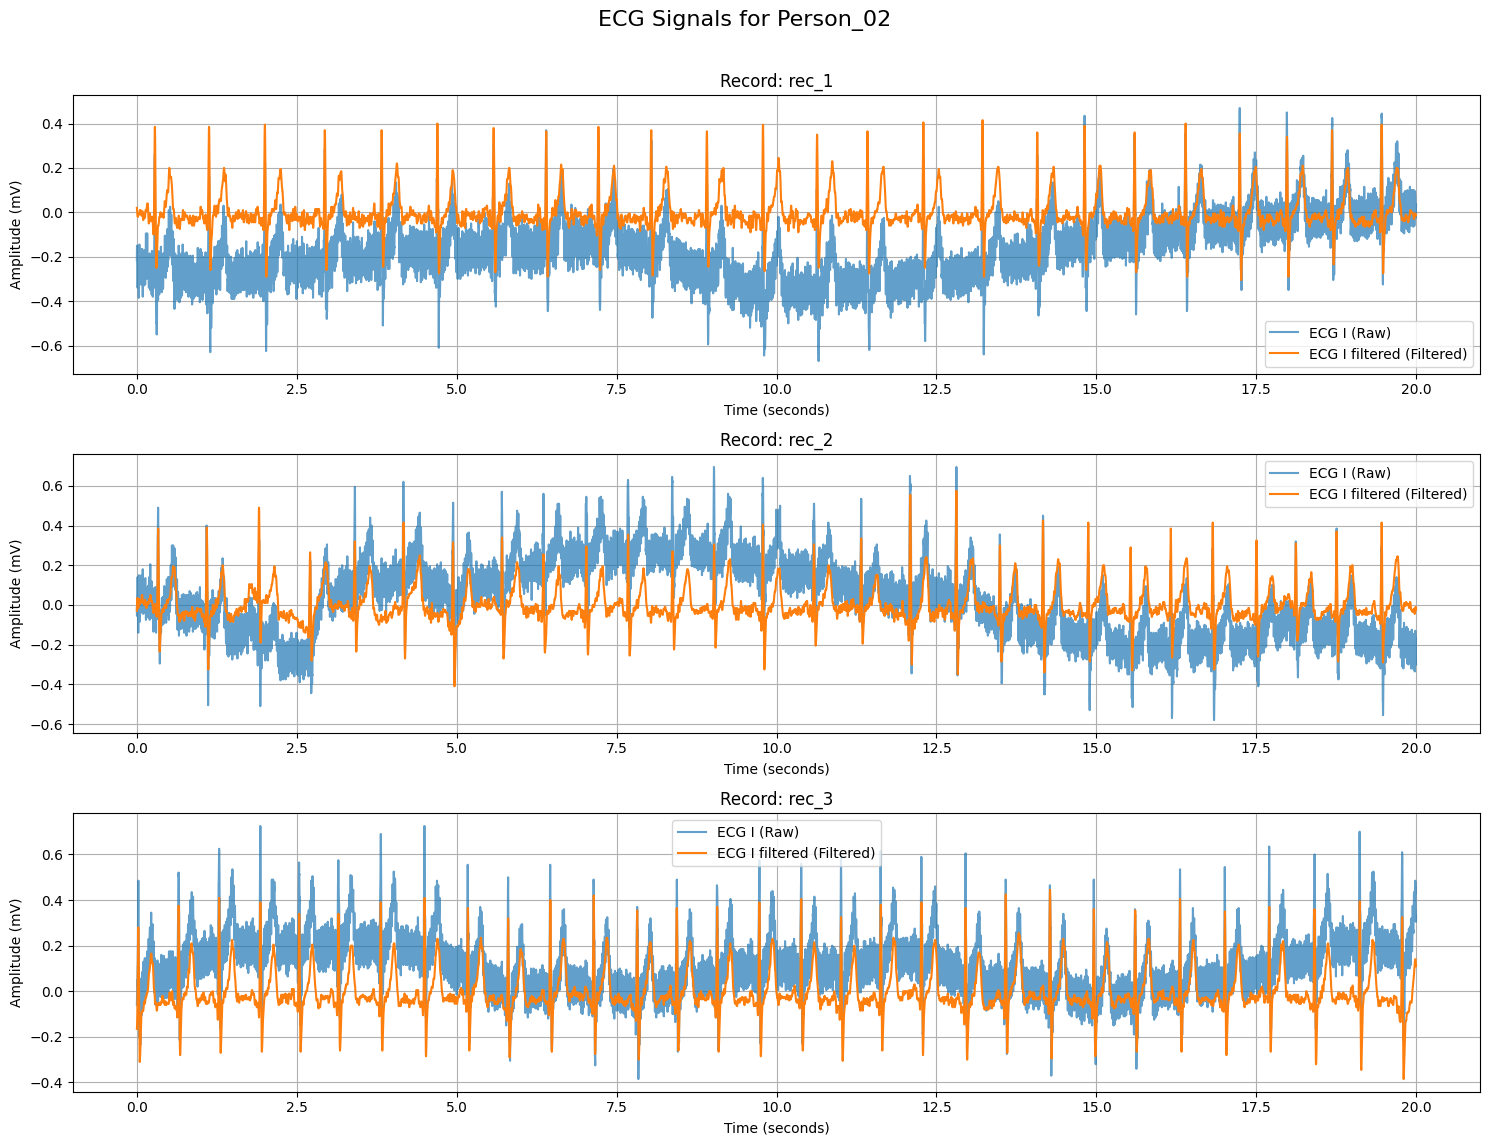


--- Processing Subject: Person_03 ---
Attempting to load: /kaggle/input/ecg-sample/sample/Person_03/rec_1
Successfully loaded Person_03/rec_1:
  Sampling Frequency (fs): 500 Hz
  Number of samples: 10000
  Recording duration: 20.00 seconds
  Number of signals: 2
  Signal labels: ['ECG I', 'ECG I filtered']
Attempting to load: /kaggle/input/ecg-sample/sample/Person_03/rec_2
Successfully loaded Person_03/rec_2:
  Sampling Frequency (fs): 500 Hz
  Number of samples: 10000
  Recording duration: 20.00 seconds
  Number of signals: 2
  Signal labels: ['ECG I', 'ECG I filtered']
Attempting to load: /kaggle/input/ecg-sample/sample/Person_03/rec_3
Successfully loaded Person_03/rec_3:
  Sampling Frequency (fs): 500 Hz
  Number of samples: 10000
  Recording duration: 20.00 seconds
  Number of signals: 2
  Signal labels: ['ECG I', 'ECG I filtered']


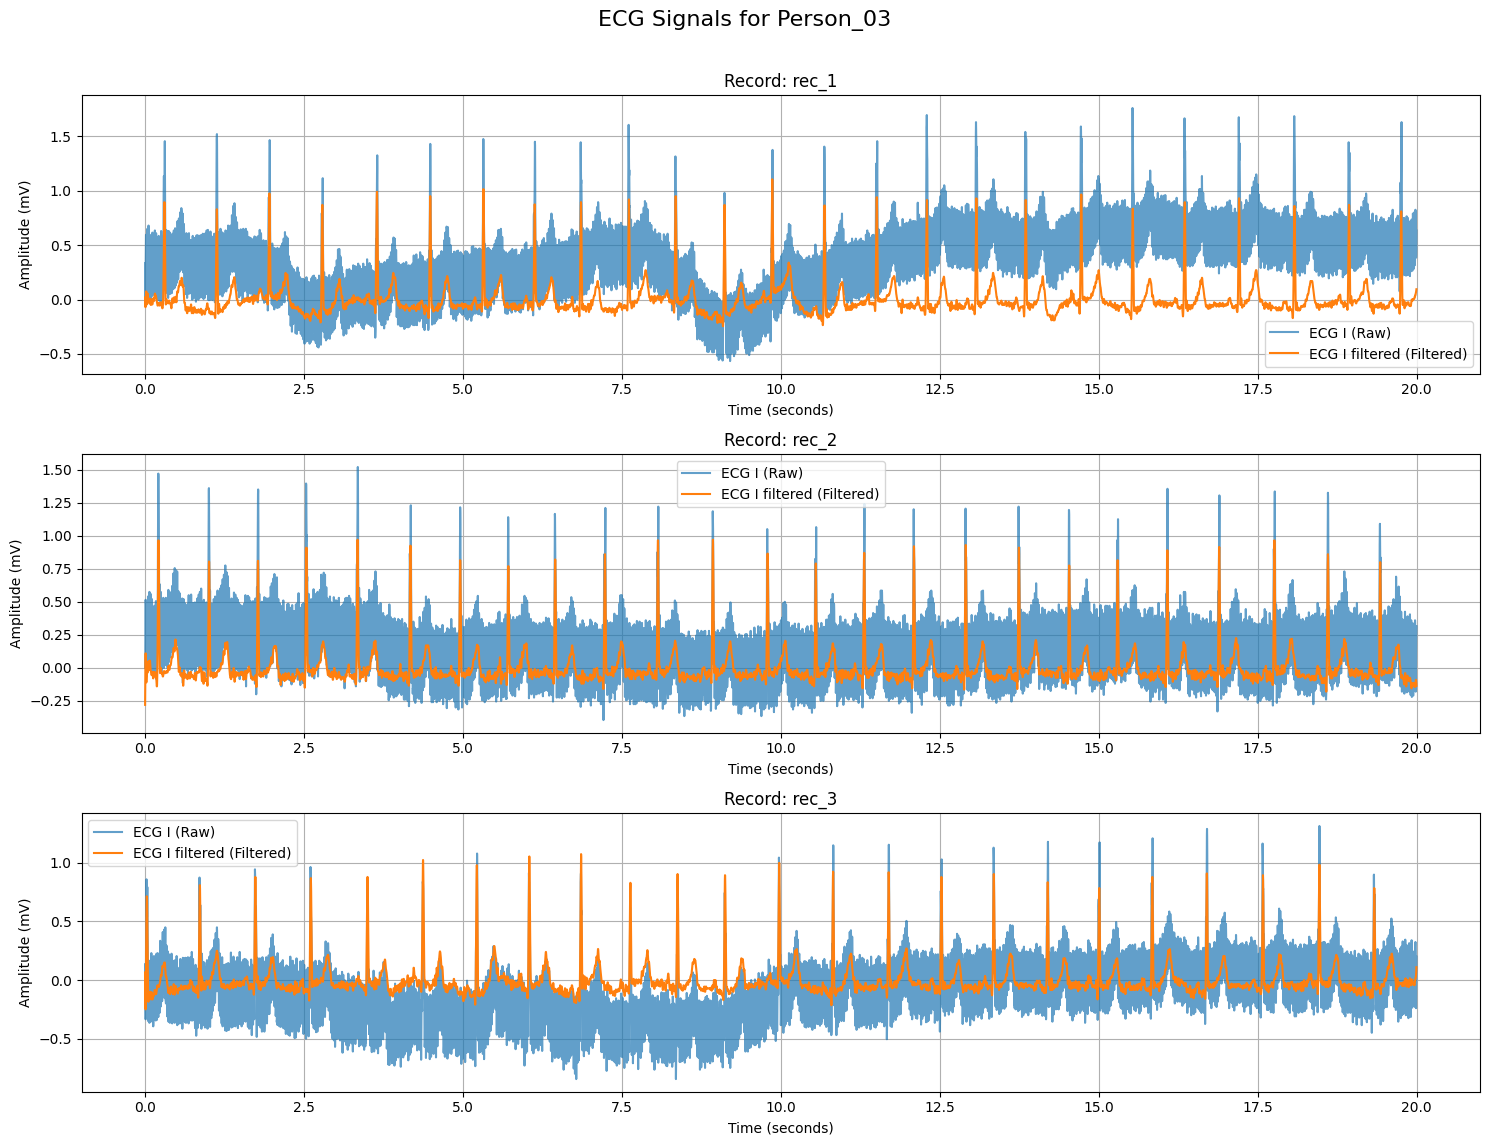

In [17]:

# --- Main Loop for Visualization ---

for subject in subjects_to_analyze:
    print(f"\n--- Processing Subject: {subject} ---")
    
    # Create a figure for each subject
    plt.figure(figsize=(15, len(records_to_analyze_per_subject) * 4)) # Adjust figure size
    plt.suptitle(f'ECG Signals for {subject}', fontsize=16)
    
    plot_index = 1 # For subplot positioning
    
    for record_name in records_to_analyze_per_subject:
        
        record, sig_raw, sig_filtered, fs, sig_labels = load_ecg_record(subject, record_name, base_data_dir)
        
        if record is not None:
            # Create time axis
            time_axis = np.arange(len(sig_raw)) / fs
            
            # Add a subplot for this record
            plt.subplot(len(records_to_analyze_per_subject), 1, plot_index)
            
            # Plot both raw and filtered signals
            plt.plot(time_axis, sig_raw, label=f'{sig_labels[0]} (Raw)', alpha=0.7)
            plt.plot(time_axis, sig_filtered, label=f'{sig_labels[1]} (Filtered)', linewidth=1.5)
            
            plt.title(f'Record: {record_name}')
            plt.xlabel('Time (seconds)')
            plt.ylabel('Amplitude (mV)') # wfdb loads in physical units
            plt.legend()
            plt.grid(True)
            
            plot_index += 1 # Move to next subplot position
            
    plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout to prevent title overlap
    plt.show()


--- Comparing Person_01/rec_1 and Person_02/rec_1 ---
Attempting to load: /kaggle/input/ecg-sample/sample/Person_01/rec_1
Successfully loaded Person_01/rec_1:
  Sampling Frequency (fs): 500 Hz
  Number of samples: 10000
  Recording duration: 20.00 seconds
  Number of signals: 2
  Signal labels: ['ECG I', 'ECG I filtered']
Attempting to load: /kaggle/input/ecg-sample/sample/Person_02/rec_1
Successfully loaded Person_02/rec_1:
  Sampling Frequency (fs): 500 Hz
  Number of samples: 10000
  Recording duration: 20.00 seconds
  Number of signals: 2
  Signal labels: ['ECG I', 'ECG I filtered']


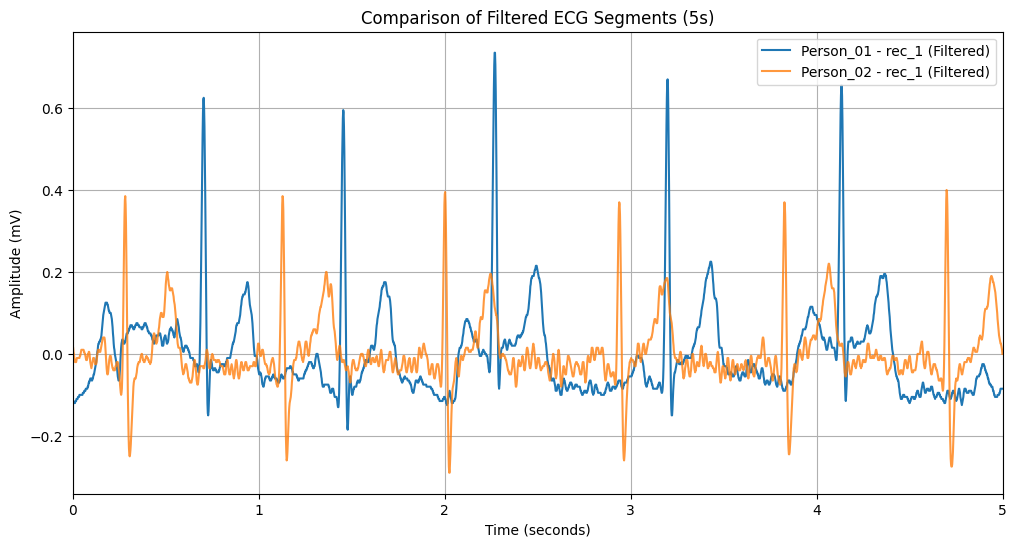


Observe the plot above. Note the differences in:
- QRS complex shape (height, width, notch patterns)
- T-wave shape (height, width, polarity)
- P-wave shape and visibility (may be subtle)
- Overall baseline level or slight variations
These morphological differences are unique to individuals.


In [18]:
print("\n--- Comparing Person_01/rec_1 and Person_02/rec_1 ---")

# Choose records to compare
subject1 = 'Person_01'
record1_name = 'rec_1'
subject2 = 'Person_02'
record2_name = 'rec_1' # Can be same or different record name

# Load the two records
record1, _, sig1_filtered, fs1, _ = load_ecg_record(subject1, record1_name, base_data_dir)
record2, _, sig2_filtered, fs2, _ = load_ecg_record(subject2, record2_name, base_data_dir)

# Check if both loaded successfully and fs match
if record1 is not None and record2 is not None and fs1 == fs2:
    fs = fs1 # Use the common sampling frequency
    
    # Select duration to plot for comparison
    comparison_duration = 5 # seconds
    comparison_samples = int(comparison_duration * fs)
    
    # Create time axis for the comparison segment
    time_compare = np.arange(comparison_samples) / fs
    
    # Create the comparison plot
    plt.figure(figsize=(12, 6))
    plt.plot(time_compare, sig1_filtered[:comparison_samples], label=f'{subject1} - {record1_name} (Filtered)', linewidth=1.5)
    plt.plot(time_compare, sig2_filtered[:comparison_samples], label=f'{subject2} - {record2_name} (Filtered)', linewidth=1.5, alpha=0.8)
    
    plt.title(f'Comparison of Filtered ECG Segments ({comparison_duration}s)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude (mV)')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, comparison_duration)
    plt.show()
    
    print("\nObserve the plot above. Note the differences in:")
    print("- QRS complex shape (height, width, notch patterns)")
    print("- T-wave shape (height, width, polarity)")
    print("- P-wave shape and visibility (may be subtle)")
    print("- Overall baseline level or slight variations")
    print("These morphological differences are unique to individuals.")
    
elif record1 is None or record2 is None:
     print("Could not load one or both records for comparison.")
elif fs1 != fs2:
     print(f"Sampling frequencies do not match ({fs1} Hz vs {fs2} Hz). Cannot directly compare.")


--- Comparing Person_01/rec_1 and Person_02/rec_1 ---
Attempting to load: /kaggle/input/ecg-sample/sample/Person_02/rec_12
Successfully loaded Person_02/rec_12:
  Sampling Frequency (fs): 500 Hz
  Number of samples: 10000
  Recording duration: 20.00 seconds
  Number of signals: 2
  Signal labels: ['ECG I', 'ECG I filtered']
Attempting to load: /kaggle/input/ecg-sample/sample/Person_03/rec_3
Successfully loaded Person_03/rec_3:
  Sampling Frequency (fs): 500 Hz
  Number of samples: 10000
  Recording duration: 20.00 seconds
  Number of signals: 2
  Signal labels: ['ECG I', 'ECG I filtered']


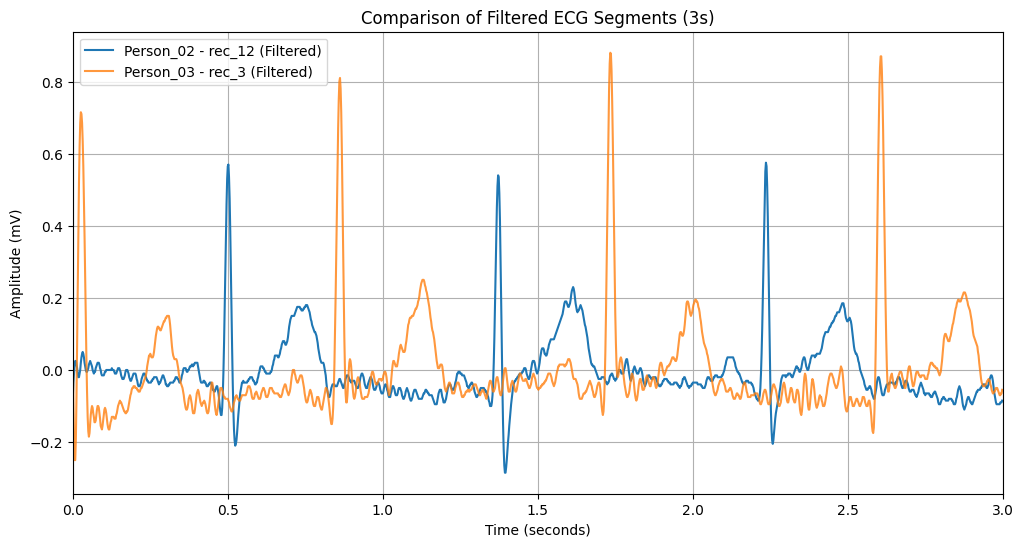

In [19]:
print("\n--- Comparing Person_01/rec_1 and Person_02/rec_1 ---")

# Choose records to compare
subject1 = 'Person_02'
record1_name = 'rec_12'
subject2 = 'Person_03'
record2_name = 'rec_3' 

# Load the two records
record1, _, sig1_filtered, fs1, _ = load_ecg_record(subject1, record1_name, base_data_dir)
record2, _, sig2_filtered, fs2, _ = load_ecg_record(subject2, record2_name, base_data_dir)

# Check if both loaded successfully and fs match
if record1 is not None and record2 is not None and fs1 == fs2:
    fs = fs1 # Use the common sampling frequency
    
    # Select duration to plot for comparison
    comparison_duration = 3 # seconds
    comparison_samples = int(comparison_duration * fs)
    
    # Create time axis for the comparison segment
    time_compare = np.arange(comparison_samples) / fs
    
    # Create the comparison plot
    plt.figure(figsize=(12, 6))
    plt.plot(time_compare, sig1_filtered[:comparison_samples], label=f'{subject1} - {record1_name} (Filtered)', linewidth=1.5)
    plt.plot(time_compare, sig2_filtered[:comparison_samples], label=f'{subject2} - {record2_name} (Filtered)', linewidth=1.5, alpha=0.8)
    
    plt.title(f'Comparison of Filtered ECG Segments ({comparison_duration}s)')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude (mV)')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, comparison_duration)
    plt.show()
    
    # print("\nObserve the plot above. Note the differences in:")
    # print("- QRS complex shape (height, width, notch patterns)")
    # print("- T-wave shape (height, width, polarity)")
    # print("- P-wave shape and visibility (may be subtle)")
    # print("- Overall baseline level or slight variations")
    # print("These morphological differences are unique to individuals.")
    
elif record1 is None or record2 is None:
     print("Could not load one or both records for comparison.")
elif fs1 != fs2:
     print(f"Sampling frequencies do not match ({fs1} Hz vs {fs2} Hz). Cannot directly compare.")

Attempting to load: /kaggle/input/ecg-sample/sample/Person_01/rec_1
Loaded Person_01/rec_1, fs=500 Hz, samples=10000
Attempting to load: /kaggle/input/ecg-sample/sample/Person_02/rec_1
Loaded Person_02/rec_1, fs=500 Hz, samples=10000
Extracted template: 3.0s (1500 samples) starting at 2.0s
Calculating similarity scores...
Similarity calculation complete.

Best match found:
  Score (NCC): 0.5421
  Index in target signal: 403
  Time in target signal: 0.81 seconds


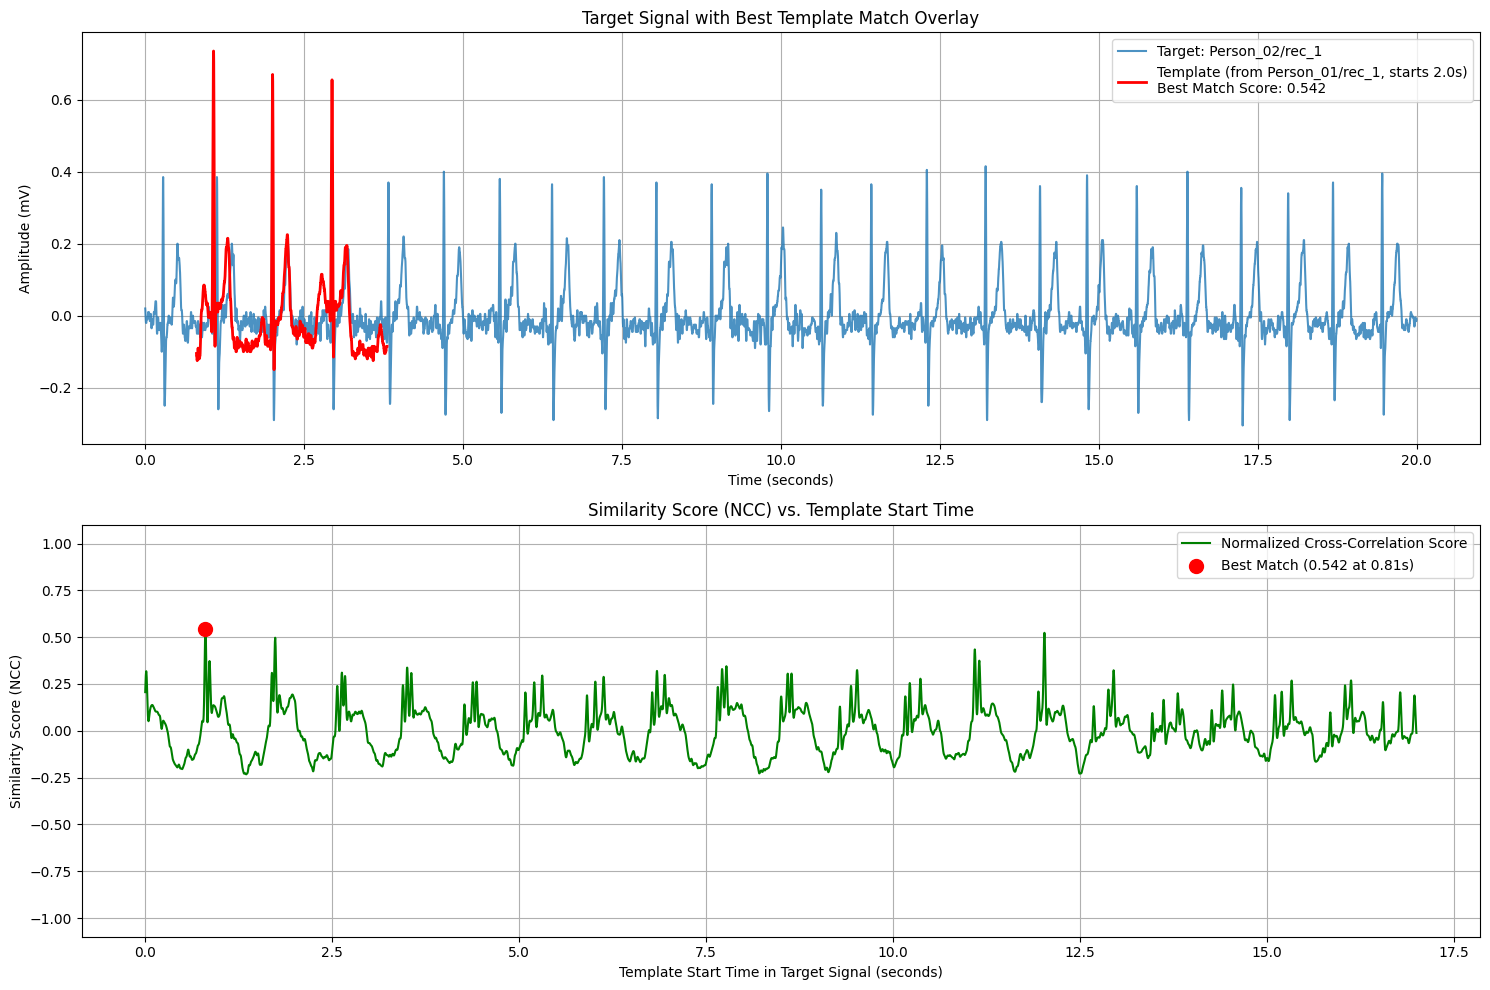

In [20]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal # Using signal submodule more explicitly

# --- Configuration ---
# Adjust this path based on your Kaggle dataset location
base_data_dir = '/kaggle/input/ecg-sample/sample/' 

# --- Function to Load ECG Record (Modified slightly for clarity) ---
def load_filtered_ecg(subject_id, record_name, base_dir):
    """Loads a specific ECG record and returns only the filtered signal and fs."""
    record_path_base = os.path.join(base_dir, subject_id, record_name)
    print(f"Attempting to load: {record_path_base}")
    try:
        record = wfdb.rdrecord(record_path_base)
        # Ensure the record has enough signals and fs is valid
        if record.p_signal is not None and record.n_sig >= 2 and record.fs is not None:
             signal_filtered = record.p_signal[:, 1] # Get the filtered signal
             fs = record.fs
             print(f"Loaded {subject_id}/{record_name}, fs={fs} Hz, samples={len(signal_filtered)}")
             return signal_filtered, fs
        else:
            print(f"Error: Record {subject_id}/{record_name} has insufficient data or invalid fs.")
            return None, None
    except Exception as e:
        print(f"Error loading {subject_id}/{record_name}: {e}")
        return None, None

# --- Parameters for Sliding Comparison ---
template_subject = 'Person_01'
template_record = 'rec_1'
template_start_time_sec = 2.0  # Start the template 2 seconds into Person_01/rec_1
template_duration_sec = 3.0   # Make the template 3 seconds long

target_subject = 'Person_02'
target_record = 'rec_1'       # Signal to search within

# --- Load the signals ---
template_signal, fs_template = load_filtered_ecg(template_subject, template_record, base_data_dir)
target_signal, fs_target = load_filtered_ecg(target_subject, target_record, base_data_dir)

# --- Proceed only if signals loaded correctly and fs matches ---
if template_signal is not None and target_signal is not None:
    if fs_template != fs_target:
        print(f"Error: Sampling frequencies don't match ({fs_template} vs {fs_target}). Cannot compare.")
    else:
        fs = fs_template # Use the common sampling frequency
        
        # --- Extract the Template ---
        template_start_sample = int(template_start_time_sec * fs)
        template_len = int(template_duration_sec * fs)
        template_end_sample = template_start_sample + template_len

        if template_end_sample > len(template_signal):
            print(f"Error: Template window exceeds length of {template_subject}/{template_record}.")
        else:
            template = template_signal[template_start_sample:template_end_sample]
            print(f"Extracted template: {template_duration_sec}s ({template_len} samples) starting at {template_start_time_sec}s")

            # --- Perform Sliding Window Comparison using Normalized Cross-Correlation ---
            target_len = len(target_signal)
            
            if template_len > target_len:
                 print("Error: Template is longer than the target signal.")
            else:
                # Array to store similarity scores
                similarity_scores = np.zeros(target_len - template_len + 1)
                
                # --- Pre-calculate template mean and std deviation ---
                # Important for efficiency and normalization formula
                template_mean = np.mean(template)
                template_std = np.std(template)
                template_norm = template - template_mean # Mean-centered template
                
                print("Calculating similarity scores...")
                # Avoid division by zero if template is flat
                if template_std < 1e-9: 
                    print("Warning: Template standard deviation is near zero (flat signal?). Scores will be zero.")
                
                # Slide the window
                for i in range(target_len - template_len + 1):
                    # Extract current segment from target signal
                    segment = target_signal[i : i + template_len]
                    
                    # Calculate segment mean and std dev
                    segment_mean = np.mean(segment)
                    segment_std = np.std(segment)
                    
                    # Calculate Normalized Cross-Correlation (NCC)
                    # Avoid division by zero if segment or template is flat
                    if template_std < 1e-9 or segment_std < 1e-9:
                        score = 0.0
                    else:
                        segment_norm = segment - segment_mean # Mean-centered segment
                        # NCC = E[(template - mean_t) * (segment - mean_s)] / (std_t * std_s)
                        # E[...] is approximated by sum / N 
                        numerator = np.sum(template_norm * segment_norm)
                        denominator = template_std * segment_std * template_len # (N * std_t * std_s) if using sample std dev formula
                        score = numerator / denominator
                        
                    similarity_scores[i] = score
                    
                    # Optional: Print progress every N steps
                    # if i % 500 == 0: 
                    #      print(f"  Processed step {i}/{target_len - template_len}")

                print("Similarity calculation complete.")

                # Find the best match
                best_match_index = np.argmax(similarity_scores)
                best_match_score = similarity_scores[best_match_index]
                best_match_time_sec = best_match_index / fs
                
                print(f"\nBest match found:")
                print(f"  Score (NCC): {best_match_score:.4f}")
                print(f"  Index in target signal: {best_match_index}")
                print(f"  Time in target signal: {best_match_time_sec:.2f} seconds")

                # --- Visualization ---
                plt.figure(figsize=(15, 10))

                # 1. Plot Target Signal and the Template at its best match location
                plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
                time_axis_target = np.arange(target_len) / fs
                plt.plot(time_axis_target, target_signal, label=f'Target: {target_subject}/{target_record}', alpha=0.8)
                
                # Time axis for the template positioned at the best match
                time_axis_template_match = np.arange(best_match_index, best_match_index + template_len) / fs
                plt.plot(time_axis_template_match, template, label=f'Template (from {template_subject}/{template_record}, starts {template_start_time_sec:.1f}s)\nBest Match Score: {best_match_score:.3f}', color='red', linewidth=2)
                
                plt.title('Target Signal with Best Template Match Overlay')
                plt.xlabel('Time (seconds)')
                plt.ylabel('Amplitude (mV)')
                plt.legend(loc='upper right')
                plt.grid(True)

                # 2. Plot Similarity Scores
                plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
                time_axis_scores = np.arange(target_len - template_len + 1) / fs # Time corresponds to the start of the window
                plt.plot(time_axis_scores, similarity_scores, label='Normalized Cross-Correlation Score', color='green')
                plt.scatter(best_match_time_sec, best_match_score, color='red', s=100, zorder=5, label=f'Best Match ({best_match_score:.3f} at {best_match_time_sec:.2f}s)') # Highlight best match
                
                plt.title('Similarity Score (NCC) vs. Template Start Time')
                plt.xlabel('Template Start Time in Target Signal (seconds)')
                plt.ylabel('Similarity Score (NCC)')
                plt.legend(loc='upper right')
                plt.grid(True)
                plt.ylim(-1.1, 1.1) # NCC range is -1 to 1

                plt.tight_layout()
                plt.show()

elif template_signal is None:
    print("Could not load the template signal.")
elif target_signal is None:
    print("Could not load the target signal.")

Attempting to load: /kaggle/input/ecg-sample/sample/Person_01/rec_1
Loaded Person_01/rec_1, fs=500 Hz, samples=10000
Attempting to load: /kaggle/input/ecg-sample/sample/Person_03/rec_2
Loaded Person_03/rec_2, fs=500 Hz, samples=10000
Extracted template: 3.0s (1500 samples) starting at 2.0s
Calculating similarity scores...
Similarity calculation complete.

Best match found:
  Score (NCC): 0.3569
  Index in target signal: 8314
  Time in target signal: 16.63 seconds


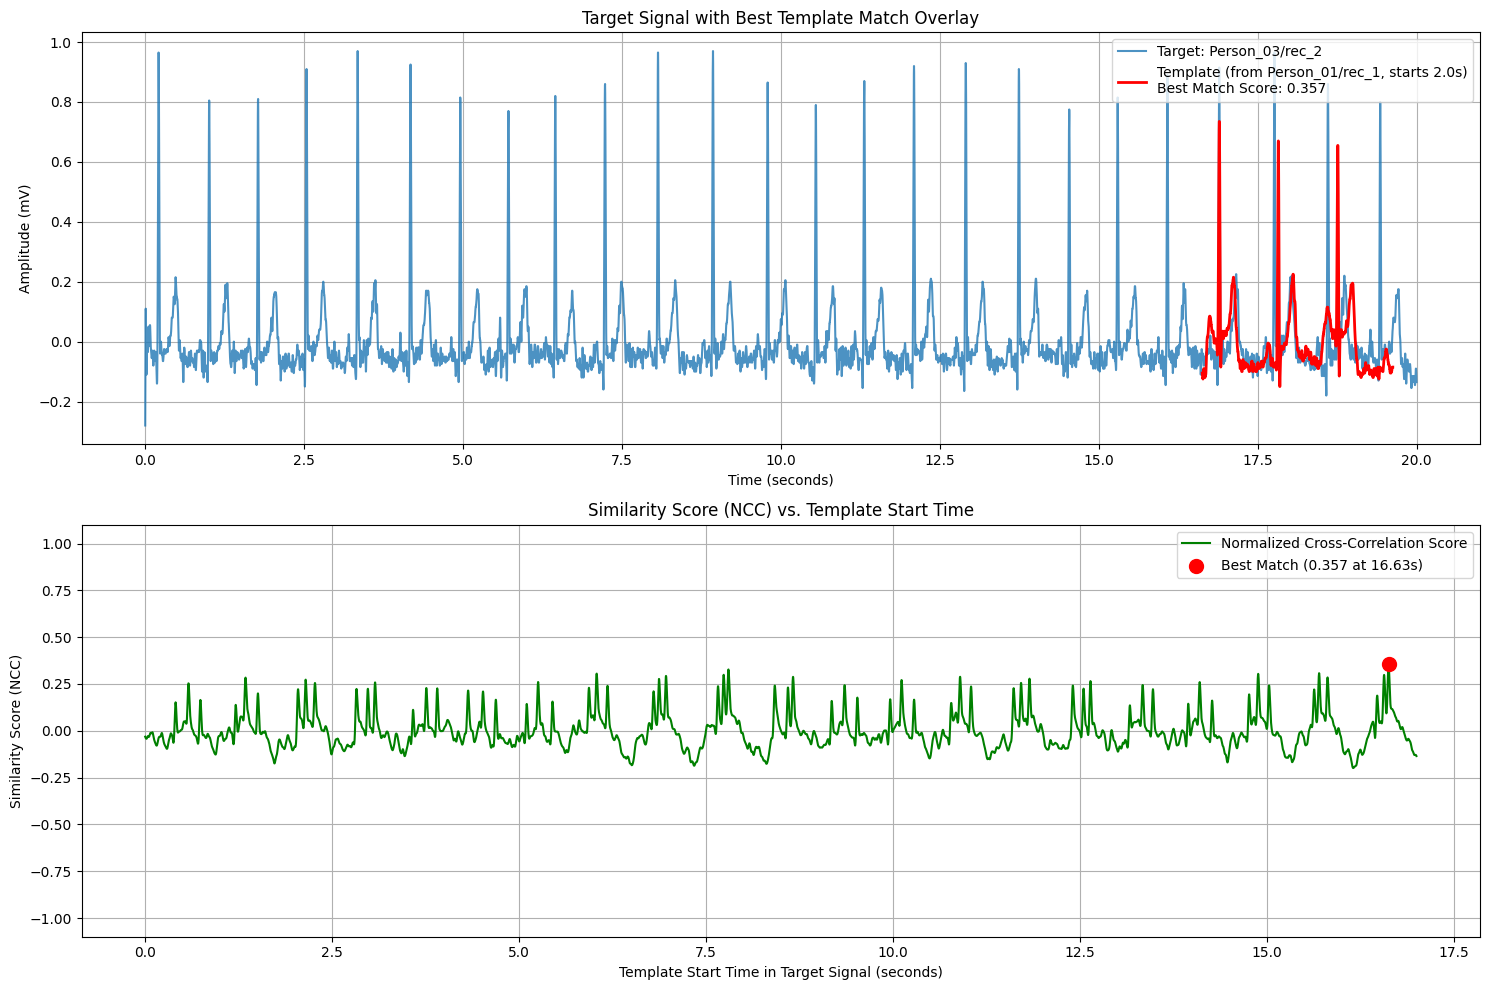

In [21]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal # Using signal submodule more explicitly

# --- Configuration ---
# Adjust this path based on your Kaggle dataset location
base_data_dir = '/kaggle/input/ecg-sample/sample/' 

# --- Function to Load ECG Record (Modified slightly for clarity) ---
def load_filtered_ecg(subject_id, record_name, base_dir):
    """Loads a specific ECG record and returns only the filtered signal and fs."""
    record_path_base = os.path.join(base_dir, subject_id, record_name)
    print(f"Attempting to load: {record_path_base}")
    try:
        record = wfdb.rdrecord(record_path_base)
        # Ensure the record has enough signals and fs is valid
        if record.p_signal is not None and record.n_sig >= 2 and record.fs is not None:
             signal_filtered = record.p_signal[:, 1] # Get the filtered signal
             fs = record.fs
             print(f"Loaded {subject_id}/{record_name}, fs={fs} Hz, samples={len(signal_filtered)}")
             return signal_filtered, fs
        else:
            print(f"Error: Record {subject_id}/{record_name} has insufficient data or invalid fs.")
            return None, None
    except Exception as e:
        print(f"Error loading {subject_id}/{record_name}: {e}")
        return None, None

# --- Parameters for Sliding Comparison ---
template_subject = 'Person_01'
template_record = 'rec_1'
template_start_time_sec = 2.0  # Start the template 2 seconds into Person_01/rec_1
template_duration_sec = 3.0   # Make the template 3 seconds long

target_subject = 'Person_03'
target_record = 'rec_2'       # Signal to search within

# --- Load the signals ---
template_signal, fs_template = load_filtered_ecg(template_subject, template_record, base_data_dir)
target_signal, fs_target = load_filtered_ecg(target_subject, target_record, base_data_dir)

# --- Proceed only if signals loaded correctly and fs matches ---
if template_signal is not None and target_signal is not None:
    if fs_template != fs_target:
        print(f"Error: Sampling frequencies don't match ({fs_template} vs {fs_target}). Cannot compare.")
    else:
        fs = fs_template # Use the common sampling frequency
        
        # --- Extract the Template ---
        template_start_sample = int(template_start_time_sec * fs)
        template_len = int(template_duration_sec * fs)
        template_end_sample = template_start_sample + template_len

        if template_end_sample > len(template_signal):
            print(f"Error: Template window exceeds length of {template_subject}/{template_record}.")
        else:
            template = template_signal[template_start_sample:template_end_sample]
            print(f"Extracted template: {template_duration_sec}s ({template_len} samples) starting at {template_start_time_sec}s")

            # --- Perform Sliding Window Comparison using Normalized Cross-Correlation ---
            target_len = len(target_signal)
            
            if template_len > target_len:
                 print("Error: Template is longer than the target signal.")
            else:
                # Array to store similarity scores
                similarity_scores = np.zeros(target_len - template_len + 1)
                
                # --- Pre-calculate template mean and std deviation ---
                # Important for efficiency and normalization formula
                template_mean = np.mean(template)
                template_std = np.std(template)
                template_norm = template - template_mean # Mean-centered template
                
                print("Calculating similarity scores...")
                # Avoid division by zero if template is flat
                if template_std < 1e-9: 
                    print("Warning: Template standard deviation is near zero (flat signal?). Scores will be zero.")
                
                # Slide the window
                for i in range(target_len - template_len + 1):
                    # Extract current segment from target signal
                    segment = target_signal[i : i + template_len]
                    
                    # Calculate segment mean and std dev
                    segment_mean = np.mean(segment)
                    segment_std = np.std(segment)
                    
                    # Calculate Normalized Cross-Correlation (NCC)
                    # Avoid division by zero if segment or template is flat
                    if template_std < 1e-9 or segment_std < 1e-9:
                        score = 0.0
                    else:
                        segment_norm = segment - segment_mean # Mean-centered segment
                        # NCC = E[(template - mean_t) * (segment - mean_s)] / (std_t * std_s)
                        # E[...] is approximated by sum / N 
                        numerator = np.sum(template_norm * segment_norm)
                        denominator = template_std * segment_std * template_len # (N * std_t * std_s) if using sample std dev formula
                        score = numerator / denominator
                        
                    similarity_scores[i] = score
                    
                    # Optional: Print progress every N steps
                    # if i % 500 == 0: 
                    #      print(f"  Processed step {i}/{target_len - template_len}")

                print("Similarity calculation complete.")

                # Find the best match
                best_match_index = np.argmax(similarity_scores)
                best_match_score = similarity_scores[best_match_index]
                best_match_time_sec = best_match_index / fs
                
                print(f"\nBest match found:")
                print(f"  Score (NCC): {best_match_score:.4f}")
                print(f"  Index in target signal: {best_match_index}")
                print(f"  Time in target signal: {best_match_time_sec:.2f} seconds")

                # --- Visualization ---
                plt.figure(figsize=(15, 10))

                # 1. Plot Target Signal and the Template at its best match location
                plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
                time_axis_target = np.arange(target_len) / fs
                plt.plot(time_axis_target, target_signal, label=f'Target: {target_subject}/{target_record}', alpha=0.8)
                
                # Time axis for the template positioned at the best match
                time_axis_template_match = np.arange(best_match_index, best_match_index + template_len) / fs
                plt.plot(time_axis_template_match, template, label=f'Template (from {template_subject}/{template_record}, starts {template_start_time_sec:.1f}s)\nBest Match Score: {best_match_score:.3f}', color='red', linewidth=2)
                
                plt.title('Target Signal with Best Template Match Overlay')
                plt.xlabel('Time (seconds)')
                plt.ylabel('Amplitude (mV)')
                plt.legend(loc='upper right')
                plt.grid(True)

                # 2. Plot Similarity Scores
                plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
                time_axis_scores = np.arange(target_len - template_len + 1) / fs # Time corresponds to the start of the window
                plt.plot(time_axis_scores, similarity_scores, label='Normalized Cross-Correlation Score', color='green')
                plt.scatter(best_match_time_sec, best_match_score, color='red', s=100, zorder=5, label=f'Best Match ({best_match_score:.3f} at {best_match_time_sec:.2f}s)') # Highlight best match
                
                plt.title('Similarity Score (NCC) vs. Template Start Time')
                plt.xlabel('Template Start Time in Target Signal (seconds)')
                plt.ylabel('Similarity Score (NCC)')
                plt.legend(loc='upper right')
                plt.grid(True)
                plt.ylim(-1.1, 1.1) # NCC range is -1 to 1

                plt.tight_layout()
                plt.show()

elif template_signal is None:
    print("Could not load the template signal.")
elif target_signal is None:
    print("Could not load the target signal.")

Attempting to load: /kaggle/input/ecg-sample/sample/Person_02/rec_1
Loaded Person_02/rec_1, fs=500 Hz, samples=10000
Attempting to load: /kaggle/input/ecg-sample/sample/Person_03/rec_3
Loaded Person_03/rec_3, fs=500 Hz, samples=10000
Extracted template: 3.0s (1500 samples) starting at 2.0s
Calculating similarity scores...
Similarity calculation complete.

Best match found:
  Score (NCC): 0.5275
  Index in target signal: 8322
  Time in target signal: 16.64 seconds


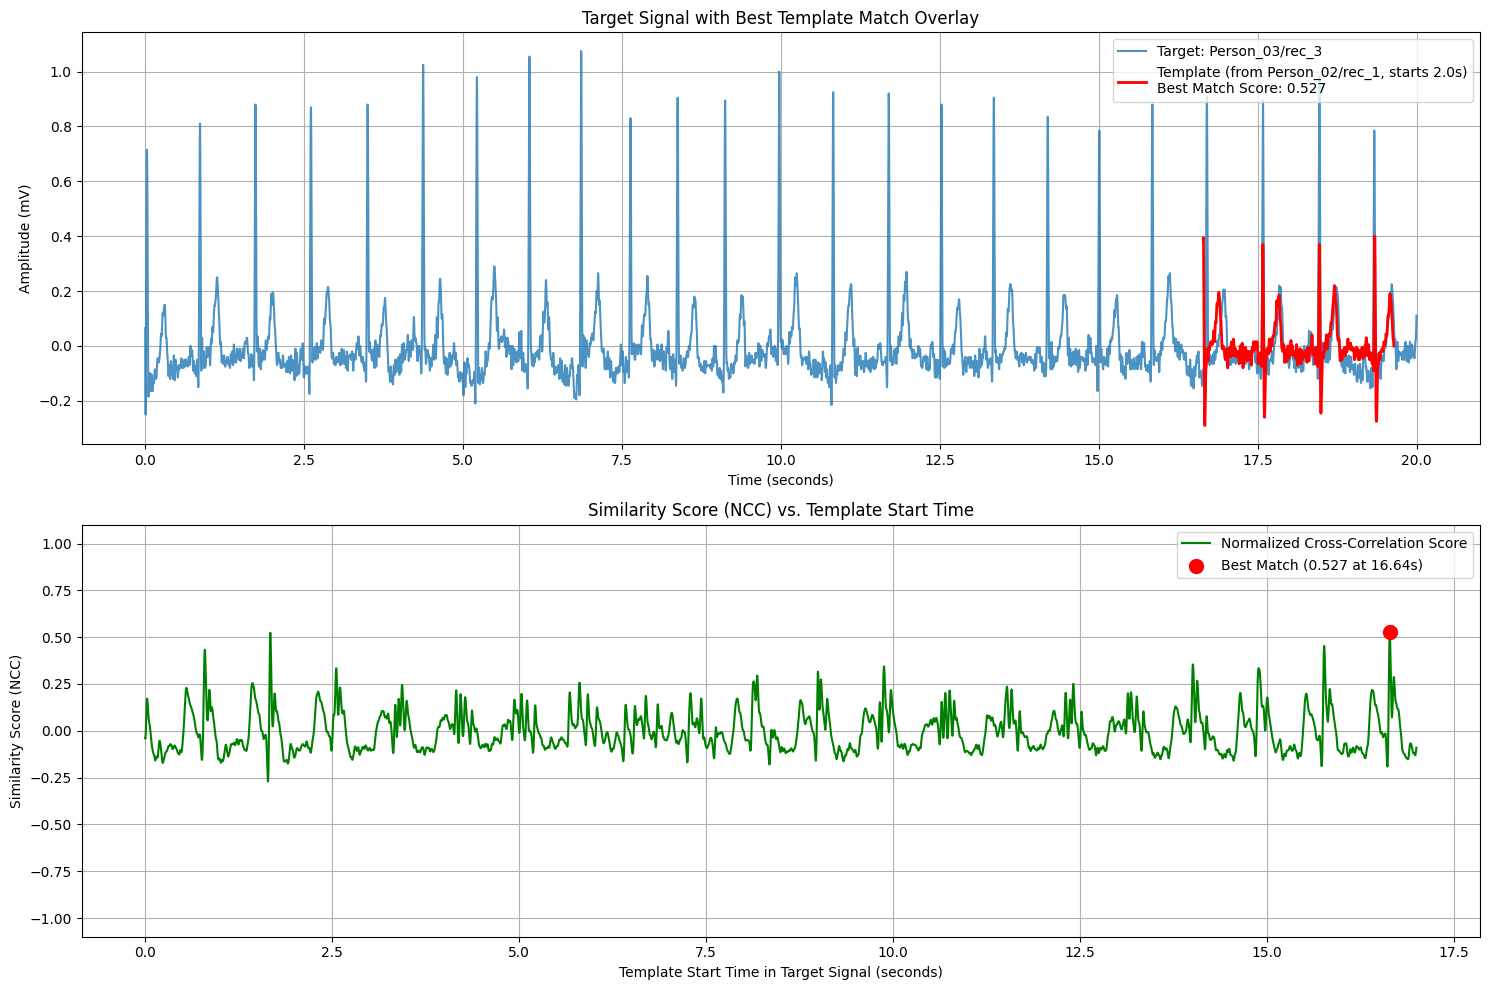

In [22]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal # Using signal submodule more explicitly

# --- Configuration ---
# Adjust this path based on your Kaggle dataset location
base_data_dir = '/kaggle/input/ecg-sample/sample/' 

# --- Function to Load ECG Record (Modified slightly for clarity) ---
def load_filtered_ecg(subject_id, record_name, base_dir):
    """Loads a specific ECG record and returns only the filtered signal and fs."""
    record_path_base = os.path.join(base_dir, subject_id, record_name)
    print(f"Attempting to load: {record_path_base}")
    try:
        record = wfdb.rdrecord(record_path_base)
        # Ensure the record has enough signals and fs is valid
        if record.p_signal is not None and record.n_sig >= 2 and record.fs is not None:
             signal_filtered = record.p_signal[:, 1] # Get the filtered signal
             fs = record.fs
             print(f"Loaded {subject_id}/{record_name}, fs={fs} Hz, samples={len(signal_filtered)}")
             return signal_filtered, fs
        else:
            print(f"Error: Record {subject_id}/{record_name} has insufficient data or invalid fs.")
            return None, None
    except Exception as e:
        print(f"Error loading {subject_id}/{record_name}: {e}")
        return None, None

# --- Parameters for Sliding Comparison ---
template_subject = 'Person_02'
template_record = 'rec_1'
template_start_time_sec = 2.0  # Start the template 2 seconds into Person_01/rec_1
template_duration_sec = 3.0   # Make the template 3 seconds long

target_subject = 'Person_03'
target_record = 'rec_3'       # Signal to search within

# --- Load the signals ---
template_signal, fs_template = load_filtered_ecg(template_subject, template_record, base_data_dir)
target_signal, fs_target = load_filtered_ecg(target_subject, target_record, base_data_dir)

# --- Proceed only if signals loaded correctly and fs matches ---
if template_signal is not None and target_signal is not None:
    if fs_template != fs_target:
        print(f"Error: Sampling frequencies don't match ({fs_template} vs {fs_target}). Cannot compare.")
    else:
        fs = fs_template # Use the common sampling frequency
        
        # --- Extract the Template ---
        template_start_sample = int(template_start_time_sec * fs)
        template_len = int(template_duration_sec * fs)
        template_end_sample = template_start_sample + template_len

        if template_end_sample > len(template_signal):
            print(f"Error: Template window exceeds length of {template_subject}/{template_record}.")
        else:
            template = template_signal[template_start_sample:template_end_sample]
            print(f"Extracted template: {template_duration_sec}s ({template_len} samples) starting at {template_start_time_sec}s")

            # --- Perform Sliding Window Comparison using Normalized Cross-Correlation ---
            target_len = len(target_signal)
            
            if template_len > target_len:
                 print("Error: Template is longer than the target signal.")
            else:
                # Array to store similarity scores
                similarity_scores = np.zeros(target_len - template_len + 1)
                
                # --- Pre-calculate template mean and std deviation ---
                # Important for efficiency and normalization formula
                template_mean = np.mean(template)
                template_std = np.std(template)
                template_norm = template - template_mean # Mean-centered template
                
                print("Calculating similarity scores...")
                # Avoid division by zero if template is flat
                if template_std < 1e-9: 
                    print("Warning: Template standard deviation is near zero (flat signal?). Scores will be zero.")
                
                # Slide the window
                for i in range(target_len - template_len + 1):
                    # Extract current segment from target signal
                    segment = target_signal[i : i + template_len]
                    
                    # Calculate segment mean and std dev
                    segment_mean = np.mean(segment)
                    segment_std = np.std(segment)
                    
                    # Calculate Normalized Cross-Correlation (NCC)
                    # Avoid division by zero if segment or template is flat
                    if template_std < 1e-9 or segment_std < 1e-9:
                        score = 0.0
                    else:
                        segment_norm = segment - segment_mean # Mean-centered segment
                        # NCC = E[(template - mean_t) * (segment - mean_s)] / (std_t * std_s)
                        # E[...] is approximated by sum / N 
                        numerator = np.sum(template_norm * segment_norm)
                        denominator = template_std * segment_std * template_len # (N * std_t * std_s) if using sample std dev formula
                        score = numerator / denominator
                        
                    similarity_scores[i] = score
                    
                    # Optional: Print progress every N steps
                    # if i % 500 == 0: 
                    #      print(f"  Processed step {i}/{target_len - template_len}")

                print("Similarity calculation complete.")

                # Find the best match
                best_match_index = np.argmax(similarity_scores)
                best_match_score = similarity_scores[best_match_index]
                best_match_time_sec = best_match_index / fs
                
                print(f"\nBest match found:")
                print(f"  Score (NCC): {best_match_score:.4f}")
                print(f"  Index in target signal: {best_match_index}")
                print(f"  Time in target signal: {best_match_time_sec:.2f} seconds")

                # --- Visualization ---
                plt.figure(figsize=(15, 10))

                # 1. Plot Target Signal and the Template at its best match location
                plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
                time_axis_target = np.arange(target_len) / fs
                plt.plot(time_axis_target, target_signal, label=f'Target: {target_subject}/{target_record}', alpha=0.8)
                
                # Time axis for the template positioned at the best match
                time_axis_template_match = np.arange(best_match_index, best_match_index + template_len) / fs
                plt.plot(time_axis_template_match, template, label=f'Template (from {template_subject}/{template_record}, starts {template_start_time_sec:.1f}s)\nBest Match Score: {best_match_score:.3f}', color='red', linewidth=2)
                
                plt.title('Target Signal with Best Template Match Overlay')
                plt.xlabel('Time (seconds)')
                plt.ylabel('Amplitude (mV)')
                plt.legend(loc='upper right')
                plt.grid(True)

                # 2. Plot Similarity Scores
                plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
                time_axis_scores = np.arange(target_len - template_len + 1) / fs # Time corresponds to the start of the window
                plt.plot(time_axis_scores, similarity_scores, label='Normalized Cross-Correlation Score', color='green')
                plt.scatter(best_match_time_sec, best_match_score, color='red', s=100, zorder=5, label=f'Best Match ({best_match_score:.3f} at {best_match_time_sec:.2f}s)') # Highlight best match
                
                plt.title('Similarity Score (NCC) vs. Template Start Time')
                plt.xlabel('Template Start Time in Target Signal (seconds)')
                plt.ylabel('Similarity Score (NCC)')
                plt.legend(loc='upper right')
                plt.grid(True)
                plt.ylim(-1.1, 1.1) # NCC range is -1 to 1

                plt.tight_layout()
                plt.show()

elif template_signal is None:
    print("Could not load the template signal.")
elif target_signal is None:
    print("Could not load the target signal.")

Attempting to load: /kaggle/input/ecg-sample/sample/Person_01/rec_12
Loaded Person_01/rec_12, fs=500 Hz, samples=10000
Attempting to load: /kaggle/input/ecg-sample/sample/Person_01/rec_20
Loaded Person_01/rec_20, fs=500 Hz, samples=10000
Extracted template: 3.0s (1500 samples) starting at 2.0s
Calculating similarity scores...
Similarity calculation complete.

Best match found:
  Score (NCC): 0.6676
  Index in target signal: 7579
  Time in target signal: 15.16 seconds


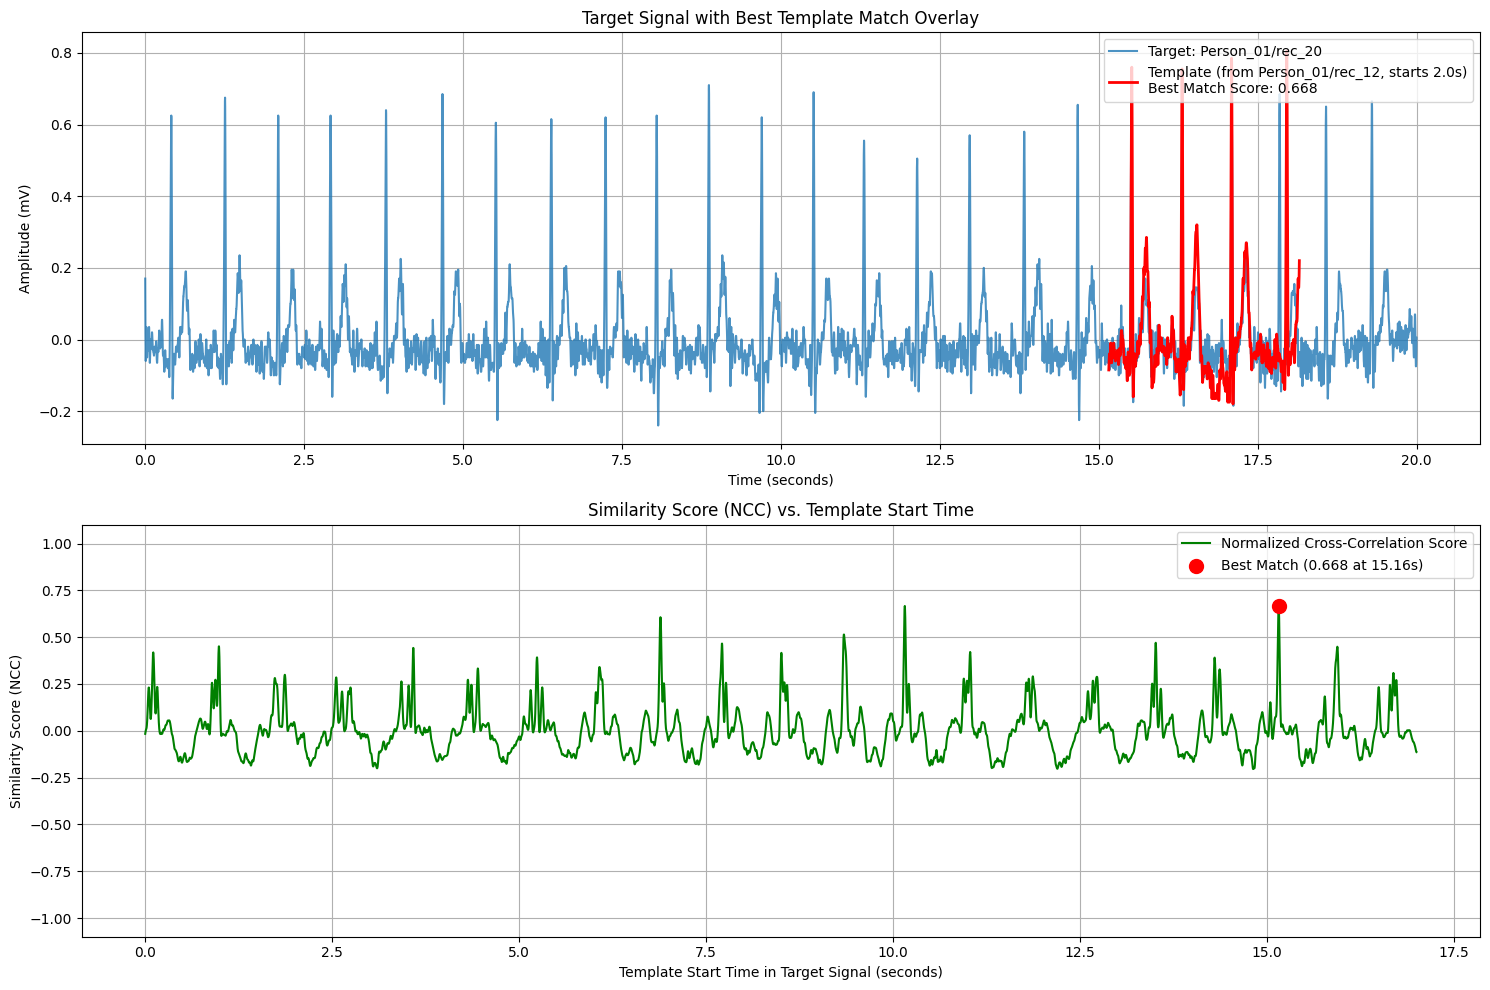

In [26]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal # Using signal submodule more explicitly

# --- Configuration ---
# Adjust this path based on your Kaggle dataset location
base_data_dir = '/kaggle/input/ecg-sample/sample/' 

# --- Function to Load ECG Record (Modified slightly for clarity) ---
def load_filtered_ecg(subject_id, record_name, base_dir):
    """Loads a specific ECG record and returns only the filtered signal and fs."""
    record_path_base = os.path.join(base_dir, subject_id, record_name)
    print(f"Attempting to load: {record_path_base}")
    try:
        record = wfdb.rdrecord(record_path_base)
        # Ensure the record has enough signals and fs is valid
        if record.p_signal is not None and record.n_sig >= 2 and record.fs is not None:
             signal_filtered = record.p_signal[:, 1] # Get the filtered signal
             fs = record.fs
             print(f"Loaded {subject_id}/{record_name}, fs={fs} Hz, samples={len(signal_filtered)}")
             return signal_filtered, fs
        else:
            print(f"Error: Record {subject_id}/{record_name} has insufficient data or invalid fs.")
            return None, None
    except Exception as e:
        print(f"Error loading {subject_id}/{record_name}: {e}")
        return None, None

# --- Parameters for Sliding Comparison ---
template_subject = 'Person_01'
template_record = 'rec_12'
template_start_time_sec = 2.0  # Start the template 2 seconds into Person_01/rec_1
template_duration_sec = 3.0   # Make the template 3 seconds long

target_subject = 'Person_01'
target_record = 'rec_20'       # Signal to search within

# --- Load the signals ---
template_signal, fs_template = load_filtered_ecg(template_subject, template_record, base_data_dir)
target_signal, fs_target = load_filtered_ecg(target_subject, target_record, base_data_dir)

# --- Proceed only if signals loaded correctly and fs matches ---
if template_signal is not None and target_signal is not None:
    if fs_template != fs_target:
        print(f"Error: Sampling frequencies don't match ({fs_template} vs {fs_target}). Cannot compare.")
    else:
        fs = fs_template # Use the common sampling frequency
        
        # --- Extract the Template ---
        template_start_sample = int(template_start_time_sec * fs)
        template_len = int(template_duration_sec * fs)
        template_end_sample = template_start_sample + template_len

        if template_end_sample > len(template_signal):
            print(f"Error: Template window exceeds length of {template_subject}/{template_record}.")
        else:
            template = template_signal[template_start_sample:template_end_sample]
            print(f"Extracted template: {template_duration_sec}s ({template_len} samples) starting at {template_start_time_sec}s")

            # --- Perform Sliding Window Comparison using Normalized Cross-Correlation ---
            target_len = len(target_signal)
            
            if template_len > target_len:
                 print("Error: Template is longer than the target signal.")
            else:
                # Array to store similarity scores
                similarity_scores = np.zeros(target_len - template_len + 1)
                
                # --- Pre-calculate template mean and std deviation ---
                # Important for efficiency and normalization formula
                template_mean = np.mean(template)
                template_std = np.std(template)
                template_norm = template - template_mean # Mean-centered template
                
                print("Calculating similarity scores...")
                # Avoid division by zero if template is flat
                if template_std < 1e-9: 
                    print("Warning: Template standard deviation is near zero (flat signal?). Scores will be zero.")
                
                # Slide the window
                for i in range(target_len - template_len + 1):
                    # Extract current segment from target signal
                    segment = target_signal[i : i + template_len]
                    
                    # Calculate segment mean and std dev
                    segment_mean = np.mean(segment)
                    segment_std = np.std(segment)
                    
                    # Calculate Normalized Cross-Correlation (NCC)
                    # Avoid division by zero if segment or template is flat
                    if template_std < 1e-9 or segment_std < 1e-9:
                        score = 0.0
                    else:
                        segment_norm = segment - segment_mean # Mean-centered segment
                        # NCC = E[(template - mean_t) * (segment - mean_s)] / (std_t * std_s)
                        # E[...] is approximated by sum / N 
                        numerator = np.sum(template_norm * segment_norm)
                        denominator = template_std * segment_std * template_len # (N * std_t * std_s) if using sample std dev formula
                        score = numerator / denominator
                        
                    similarity_scores[i] = score
                    
                    # Optional: Print progress every N steps
                    # if i % 500 == 0: 
                    #      print(f"  Processed step {i}/{target_len - template_len}")

                print("Similarity calculation complete.")

                # Find the best match
                best_match_index = np.argmax(similarity_scores)
                best_match_score = similarity_scores[best_match_index]
                best_match_time_sec = best_match_index / fs
                
                print(f"\nBest match found:")
                print(f"  Score (NCC): {best_match_score:.4f}")
                print(f"  Index in target signal: {best_match_index}")
                print(f"  Time in target signal: {best_match_time_sec:.2f} seconds")

                # --- Visualization ---
                plt.figure(figsize=(15, 10))

                # 1. Plot Target Signal and the Template at its best match location
                plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
                time_axis_target = np.arange(target_len) / fs
                plt.plot(time_axis_target, target_signal, label=f'Target: {target_subject}/{target_record}', alpha=0.8)
                
                # Time axis for the template positioned at the best match
                time_axis_template_match = np.arange(best_match_index, best_match_index + template_len) / fs
                plt.plot(time_axis_template_match, template, label=f'Template (from {template_subject}/{template_record}, starts {template_start_time_sec:.1f}s)\nBest Match Score: {best_match_score:.3f}', color='red', linewidth=2)
                
                plt.title('Target Signal with Best Template Match Overlay')
                plt.xlabel('Time (seconds)')
                plt.ylabel('Amplitude (mV)')
                plt.legend(loc='upper right')
                plt.grid(True)

                # 2. Plot Similarity Scores
                plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
                time_axis_scores = np.arange(target_len - template_len + 1) / fs # Time corresponds to the start of the window
                plt.plot(time_axis_scores, similarity_scores, label='Normalized Cross-Correlation Score', color='green')
                plt.scatter(best_match_time_sec, best_match_score, color='red', s=100, zorder=5, label=f'Best Match ({best_match_score:.3f} at {best_match_time_sec:.2f}s)') # Highlight best match
                
                plt.title('Similarity Score (NCC) vs. Template Start Time')
                plt.xlabel('Template Start Time in Target Signal (seconds)')
                plt.ylabel('Similarity Score (NCC)')
                plt.legend(loc='upper right')
                plt.grid(True)
                plt.ylim(-1.1, 1.1) # NCC range is -1 to 1

                plt.tight_layout()
                plt.show()

elif template_signal is None:
    print("Could not load the template signal.")
elif target_signal is None:
    print("Could not load the target signal.")

In [27]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal # Using signal submodule more explicitly

# --- Configuration ---
base_data_dir = '/kaggle/input/ecg-sample/sample/' 

# --- Function to Load ECG Record ---
def load_filtered_ecg(subject_id, record_name, base_dir):
    """Loads a specific ECG record and returns only the filtered signal and fs."""
    record_path_base = os.path.join(base_dir, subject_id, record_name)
    # print(f"Attempting to load: {record_path_base}") # Less verbose now
    try:
        record = wfdb.rdrecord(record_path_base)
        if record.p_signal is not None and record.n_sig >= 2 and record.fs is not None:
             signal_filtered = record.p_signal[:, 1]
             fs = record.fs
             # print(f"Loaded {subject_id}/{record_name}, fs={fs} Hz, samples={len(signal_filtered)}")
             return signal_filtered, fs
        else:
            print(f"Error: Record {subject_id}/{record_name} has insufficient data or invalid fs.")
            return None, None
    except Exception as e:
        print(f"Error loading {subject_id}/{record_name}: {e}")
        return None, None

# --- Function for Similarity Calculation ---
def calculate_max_similarity(template, target_signal, fs):
    """Calculates max NCC score by sliding template over target_signal."""
    template_len = len(template)
    target_len = len(target_signal)

    if template_len == 0 or target_len == 0 or template_len > target_len:
        print("Warning: Invalid template or target signal length.")
        return 0.0 # Cannot compute similarity

    similarity_scores = np.zeros(target_len - template_len + 1)
    template_mean = np.mean(template)
    template_std = np.std(template)
    
    # Avoid division by zero if template is flat
    if template_std < 1e-9: 
        print("Warning: Template standard deviation is near zero.")
        return 0.0 

    template_norm = template - template_mean # Mean-centered template

    for i in range(target_len - template_len + 1):
        segment = target_signal[i : i + template_len]
        segment_mean = np.mean(segment)
        segment_std = np.std(segment)

        if segment_std < 1e-9:
            score = 0.0 # Segment is flat
        else:
            segment_norm = segment - segment_mean
            numerator = np.sum(template_norm * segment_norm)
            # Correct denominator for NCC definition: (N-1)*std1*std2 or N*std1*std2 depending on std formula.
            # Using numpy's default std (ddof=0), we need N.
            # Alternatively, using correlate function is often faster and handles normalization.
            # Let's stick to the manual formula for now:
            denominator = template_std * segment_std * template_len 
            score = numerator / denominator
            
        similarity_scores[i] = score

    # Clip scores just in case of floating point inaccuracies slightly exceeding +/- 1
    similarity_scores = np.clip(similarity_scores, -1.0, 1.0) 
    
    return np.max(similarity_scores)


# --- Parameters ---
template_subject = 'Person_01'
template_record_name = 'rec_12'  # Record to get the template from
template_start_time_sec = 2.0    # Start time within template_record_name
template_duration_sec = 3.0      # Duration of the template

# --- Load the Template Signal and Extract Template ---
template_signal, fs_template = load_filtered_ecg(template_subject, template_record_name, base_data_dir)

if template_signal is None:
    print(f"Fatal Error: Could not load template signal from {template_subject}/{template_record_name}")
else:
    fs = fs_template # Use this as the reference frequency
    template_start_sample = int(template_start_time_sec * fs)
    template_len = int(template_duration_sec * fs)
    template_end_sample = template_start_sample + template_len

    if template_end_sample > len(template_signal):
        print(f"Fatal Error: Template window exceeds length of {template_subject}/{template_record_name}.")
    else:
        template = template_signal[template_start_sample:template_end_sample]
        print(f"--- Extracted Template from {template_subject}/{template_record_name} ({template_duration_sec}s starting at {template_start_time_sec}s) ---")
        
        # --- Find all records for Person_01 ---
        subject_dir = os.path.join(base_data_dir, template_subject)
        try:
            # Get base names (like 'rec_1', 'rec_2') from .hea files
            all_records = sorted([
                os.path.splitext(f)[0] 
                for f in os.listdir(subject_dir) 
                if f.endswith('.hea') and f.startswith('rec_')
            ])
            print(f"Found records for {template_subject}: {all_records}")
        except FileNotFoundError:
            print(f"Error: Directory not found - {subject_dir}")
            all_records = []

        # --- Loop through target records of the same person ---
        print(f"\n--- Comparing Template with other records from {template_subject} ---")
        results = {} # Store results

        for target_record_name in all_records:
            # Skip comparing the template record with itself in this loop
            if target_record_name == template_record_name:
                print(f"Skipping self-comparison: {target_record_name}")
                continue

            print(f"Comparing with Target: {target_record_name}")
            target_signal, fs_target = load_filtered_ecg(template_subject, target_record_name, base_data_dir)

            if target_signal is None:
                print("  -> Failed to load target signal.")
                results[target_record_name] = "Load Error"
                continue
            
            if fs_target != fs:
                print(f"  -> Error: Sampling frequency mismatch ({fs_target} Hz vs template {fs} Hz). Skipping.")
                results[target_record_name] = "FS Mismatch"
                continue

            # Calculate the maximum similarity score
            max_score = calculate_max_similarity(template, target_signal, fs)
            results[target_record_name] = max_score
            print(f"  -> Max Similarity Score (NCC): {max_score:.4f}")

        # --- Print Summary ---
        print("\n--- Summary of Max Similarity Scores ---")
        print(f"Template extracted from: {template_subject}/{template_record_name}")
        for rec, score in results.items():
            if isinstance(score, str): # Handle errors
                 print(f"Target: {rec:<10} | Score: {score}")
            else:
                 print(f"Target: {rec:<10} | Score: {score:.4f}")

        print("\nNote: Scores less than 1.0 even for the same person are expected due to natural physiological variations, noise, and slight differences between recordings.")

--- Extracted Template from Person_01/rec_12 (3.0s starting at 2.0s) ---
Found records for Person_01: ['rec_1', 'rec_10', 'rec_11', 'rec_12', 'rec_13', 'rec_14', 'rec_15', 'rec_16', 'rec_17', 'rec_18', 'rec_19', 'rec_2', 'rec_20', 'rec_3', 'rec_4', 'rec_5', 'rec_6', 'rec_7', 'rec_8', 'rec_9']

--- Comparing Template with other records from Person_01 ---
Comparing with Target: rec_1
  -> Max Similarity Score (NCC): 0.5571
Comparing with Target: rec_10
  -> Max Similarity Score (NCC): 0.6060
Comparing with Target: rec_11
  -> Max Similarity Score (NCC): 0.6229
Skipping self-comparison: rec_12
Comparing with Target: rec_13
  -> Max Similarity Score (NCC): 0.6848
Comparing with Target: rec_14
  -> Max Similarity Score (NCC): 0.7007
Comparing with Target: rec_15
  -> Max Similarity Score (NCC): 0.7001
Comparing with Target: rec_16
  -> Max Similarity Score (NCC): 0.7269
Comparing with Target: rec_17
  -> Max Similarity Score (NCC): 0.7300
Comparing with Target: rec_18
  -> Max Similarity Sc

In [28]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal # Using signal submodule more explicitly

# --- Configuration ---
base_data_dir = '/kaggle/input/ecg-sample/sample/' 

# --- Function to Load ECG Record ---
def load_filtered_ecg(subject_id, record_name, base_dir):
    """Loads a specific ECG record and returns only the filtered signal and fs."""
    record_path_base = os.path.join(base_dir, subject_id, record_name)
    # print(f"Attempting to load: {record_path_base}") # Less verbose now
    try:
        record = wfdb.rdrecord(record_path_base)
        if record.p_signal is not None and record.n_sig >= 2 and record.fs is not None:
             signal_filtered = record.p_signal[:, 1]
             fs = record.fs
             # print(f"Loaded {subject_id}/{record_name}, fs={fs} Hz, samples={len(signal_filtered)}")
             return signal_filtered, fs
        else:
            # print(f"Error: Record {subject_id}/{record_name} has insufficient data or invalid fs.")
            return None, None
    except Exception as e:
        # print(f"Error loading {subject_id}/{record_name}: {e}")
        return None, None

# --- Function for Similarity Calculation ---
def calculate_max_similarity(template, target_signal, fs):
    """Calculates max NCC score by sliding template over target_signal."""
    template_len = len(template)
    target_len = len(target_signal)

    if template_len == 0 or target_len == 0 or template_len > target_len:
        # print("Warning: Invalid template or target signal length.")
        return 0.0 # Cannot compute similarity

    similarity_scores = np.zeros(target_len - template_len + 1)
    template_mean = np.mean(template)
    template_std = np.std(template)
    
    if template_std < 1e-9: 
        # print("Warning: Template standard deviation is near zero.")
        return 0.0 

    template_norm = template - template_mean # Mean-centered template

    for i in range(target_len - template_len + 1):
        segment = target_signal[i : i + template_len]
        segment_mean = np.mean(segment)
        segment_std = np.std(segment)

        if segment_std < 1e-9:
            score = 0.0 # Segment is flat
        else:
            segment_norm = segment - segment_mean
            numerator = np.sum(template_norm * segment_norm)
            denominator = template_std * segment_std * template_len 
            score = numerator / denominator
            
        similarity_scores[i] = score

    similarity_scores = np.clip(similarity_scores, -1.0, 1.0) 
    
    return np.max(similarity_scores)

# --- Parameters ---
template_subject = 'Person_01'
template_record_name = 'rec_12'  # Record to get the template from
template_start_time_sec = 2.0    # Start time within template_record_name
template_duration_sec = 3.0      # Duration of the template

other_subjects_to_compare = ['Person_02', 'Person_03'] # List of other subjects

# --- Load the Template Signal and Extract Template ---
template_signal, fs_template = load_filtered_ecg(template_subject, template_record_name, base_data_dir)

if template_signal is None:
    print(f"Fatal Error: Could not load template signal from {template_subject}/{template_record_name}")
else:
    fs = fs_template # Use this as the reference frequency
    template_start_sample = int(template_start_time_sec * fs)
    template_len = int(template_duration_sec * fs)
    template_end_sample = template_start_sample + template_len

    if template_end_sample > len(template_signal):
        print(f"Fatal Error: Template window exceeds length of {template_subject}/{template_record_name}.")
    else:
        template = template_signal[template_start_sample:template_end_sample]
        print(f"--- Extracted Template from {template_subject}/{template_record_name} ({template_duration_sec}s starting at {template_start_time_sec}s) ---")
        
        # --- Dictionary to hold all results ---
        all_results = {} 

        # === PART 1: Intra-Person Comparison (Compare template subject with their own records) ===
        print(f"\n=== PART 1: Comparing Template with other records from {template_subject} (Intra-Person) ===")
        subject_dir = os.path.join(base_data_dir, template_subject)
        intra_person_results = {}
        try:
            all_records_person1 = sorted([
                os.path.splitext(f)[0] 
                for f in os.listdir(subject_dir) 
                if f.endswith('.hea') and f.startswith('rec_')
            ])
        except FileNotFoundError:
            print(f"Error: Directory not found - {subject_dir}")
            all_records_person1 = []

        for target_record_name in all_records_person1:
            if target_record_name == template_record_name:
                print(f"Skipping self-comparison: {target_record_name}")
                continue

            print(f"Comparing with Target: {target_record_name}")
            target_signal, fs_target = load_filtered_ecg(template_subject, target_record_name, base_data_dir)

            if target_signal is None:
                print("  -> Failed to load target signal.")
                intra_person_results[target_record_name] = "Load Error"
                continue
            if fs_target != fs:
                print(f"  -> Error: FS mismatch ({fs_target} Hz vs {fs} Hz). Skipping.")
                intra_person_results[target_record_name] = "FS Mismatch"
                continue

            max_score = calculate_max_similarity(template, target_signal, fs)
            intra_person_results[target_record_name] = max_score
            print(f"  -> Max Similarity Score (NCC): {max_score:.4f}")
        
        all_results[template_subject] = intra_person_results # Store Person_01 results

        # === PART 2: Inter-Person Comparison (Compare template with other subjects) ===
        print(f"\n=== PART 2: Comparing Template from {template_subject} with records from other subjects (Inter-Person) ===")
        
        for other_subject in other_subjects_to_compare:
            print(f"\n--- Comparing with Subject: {other_subject} ---")
            subject_dir = os.path.join(base_data_dir, other_subject)
            inter_person_results_subject = {}
            try:
                all_records_other = sorted([
                    os.path.splitext(f)[0] 
                    for f in os.listdir(subject_dir) 
                    if f.endswith('.hea') and f.startswith('rec_')
                ])
            except FileNotFoundError:
                print(f"Error: Directory not found - {subject_dir}")
                all_records_other = []

            if not all_records_other:
                print(f"No records found for {other_subject}.")
                continue

            for target_record_name in all_records_other:
                print(f"Comparing with Target: {target_record_name}")
                target_signal, fs_target = load_filtered_ecg(other_subject, target_record_name, base_data_dir)

                if target_signal is None:
                    print("  -> Failed to load target signal.")
                    inter_person_results_subject[target_record_name] = "Load Error"
                    continue
                if fs_target != fs:
                    print(f"  -> Error: FS mismatch ({fs_target} Hz vs {fs} Hz). Skipping.")
                    inter_person_results_subject[target_record_name] = "FS Mismatch"
                    continue

                max_score = calculate_max_similarity(template, target_signal, fs)
                inter_person_results_subject[target_record_name] = max_score
                print(f"  -> Max Similarity Score (NCC): {max_score:.4f}")
            
            all_results[other_subject] = inter_person_results_subject # Store results for this other subject

        # --- Print Combined Summary ---
        print("\n\n--- Combined Summary of Max Similarity Scores ---")
        print(f"Template extracted from: {template_subject}/{template_record_name}")
        print("-" * 50)
        
        # Print Intra-Person results
        print(f"\nIntra-Person Comparisons ({template_subject} vs {template_subject}):")
        results_p1 = all_results.get(template_subject, {})
        if results_p1:
            for rec, score in results_p1.items():
                if isinstance(score, str):
                     print(f"  Target: {rec:<10} | Score: {score}")
                else:
                     print(f"  Target: {rec:<10} | Score: {score:.4f}")
        else:
             print("  No intra-person comparisons performed or results available.")
             
        print("-" * 50)

        # Print Inter-Person results
        print(f"\nInter-Person Comparisons ({template_subject} vs Others):")
        for other_subject in other_subjects_to_compare:
             print(f"\n  Subject: {other_subject}")
             results_other = all_results.get(other_subject, {})
             if results_other:
                  for rec, score in results_other.items():
                      if isinstance(score, str):
                           print(f"    Target: {rec:<10} | Score: {score}")
                      else:
                           print(f"    Target: {rec:<10} | Score: {score:.4f}")
             else:
                  print(f"    No comparisons performed or results available for {other_subject}.")
        
        print("-" * 50)
        print("\nKey Observation: Expect significantly higher scores for Intra-Person comparisons")
        print("(same person, different recordings) compared to Inter-Person comparisons (different people).")
        print("This difference is the basis for ECG biometric identification/authentication.")

--- Extracted Template from Person_01/rec_12 (3.0s starting at 2.0s) ---

=== PART 1: Comparing Template with other records from Person_01 (Intra-Person) ===
Comparing with Target: rec_1
  -> Max Similarity Score (NCC): 0.5571
Comparing with Target: rec_10
  -> Max Similarity Score (NCC): 0.6060
Comparing with Target: rec_11
  -> Max Similarity Score (NCC): 0.6229
Skipping self-comparison: rec_12
Comparing with Target: rec_13
  -> Max Similarity Score (NCC): 0.6848
Comparing with Target: rec_14
  -> Max Similarity Score (NCC): 0.7007
Comparing with Target: rec_15
  -> Max Similarity Score (NCC): 0.7001
Comparing with Target: rec_16
  -> Max Similarity Score (NCC): 0.7269
Comparing with Target: rec_17
  -> Max Similarity Score (NCC): 0.7300
Comparing with Target: rec_18
  -> Max Similarity Score (NCC): 0.6994
Comparing with Target: rec_19
  -> Max Similarity Score (NCC): 0.7055
Comparing with Target: rec_2
  -> Max Similarity Score (NCC): 0.5877
Comparing with Target: rec_20
  -> Max Si

In [29]:
import numpy as np

# --- Data from your output ---
intra_scores_p01 = [0.5571, 0.6060, 0.6229, 0.6848, 0.7007, 0.7001, 0.7269, 0.7300, 0.6994, 0.7055, 0.5877, 0.6676, 0.7259, 0.7408, 0.4629, 0.6656, 0.7557, 0.6972, 0.7337]
inter_scores_p02 = [0.6207, 0.6905, 0.6306, 0.6615, 0.4364, 0.2952, 0.5504, 0.5622, 0.5988, 0.3124, 0.5139, 0.4839, 0.5482, 0.4401, 0.4701, 0.2869, 0.7128, 0.6048, 0.6225, 0.8048, 0.4696, 0.6879]
inter_scores_p03 = [0.7676, 0.6016, 0.5384, 0.5812, 0.4864]
all_inter_scores = inter_scores_p02 + inter_scores_p03

# --- Calculations ---
def calculate_stats(scores, label):
    if not scores:
        print(f"\n{label}: No scores available.")
        return
    scores_arr = np.array(scores)
    count = len(scores_arr)
    mean = np.mean(scores_arr)
    std_dev = np.std(scores_arr)
    min_score = np.min(scores_arr)
    max_score = np.max(scores_arr)
    print(f"\n{label} (Count: {count}):")
    print(f"  Mean Score:   {mean:.4f}")
    print(f"  Std Dev:      {std_dev:.4f}")
    print(f"  Min Score:    {min_score:.4f}")
    print(f"  Max Score:    {max_score:.4f}")

# --- Print Summary ---
print("--- Statistical Summary of Max Similarity Scores (NCC) ---")
print(f"Template: Person_01/rec_12 (2.0s - 5.0s)")
print("-" * 60)

calculate_stats(intra_scores_p01, "Intra-Person (P01 vs P01)")
calculate_stats(inter_scores_p02, "Inter-Person (P01 vs P02)")
calculate_stats(inter_scores_p03, "Inter-Person (P01 vs P03)")
calculate_stats(all_inter_scores, "All Inter-Person (P01 vs P02 & P03)")

print("-" * 60)

# --- Interpretation ---
mean_intra = np.mean(intra_scores_p01) if intra_scores_p01 else -999
max_intra = np.max(intra_scores_p01) if intra_scores_p01 else -999
min_intra = np.min(intra_scores_p01) if intra_scores_p01 else -999

mean_inter = np.mean(all_inter_scores) if all_inter_scores else -999
max_inter = np.max(all_inter_scores) if all_inter_scores else -999
min_inter = np.min(all_inter_scores) if all_inter_scores else -999

print("\nInterpretation:")
if intra_scores_p01 and all_inter_scores:
    print(f"- The average intra-person score ({mean_intra:.4f}) is higher than the average inter-person score ({mean_inter:.4f}).")
    print(f"- Intra-person scores ranged from {min_intra:.4f} to {max_intra:.4f}.")
    print(f"- Inter-person scores ranged from {min_inter:.4f} to {max_inter:.4f}.")
    if max_inter > min_intra:
         print(f"- There is overlap between the ranges: the highest inter-person score ({max_inter:.4f})")
         print(f"  is higher than the lowest intra-person score ({min_intra:.4f}).")
         print(f"- This overlap indicates that simple template matching with a single threshold might")
         print(f"  lead to errors (False Accepts or False Rejects) in an authentication system.")
    else:
         print("- The ranges do not overlap, suggesting good separation with this template.")
    print("- More sophisticated features and machine learning models are typically needed")
    print("  to improve separation and handle this variability effectively.")
else:
    print("- Could not perform full interpretation due to missing score data.")

--- Statistical Summary of Max Similarity Scores (NCC) ---
Template: Person_01/rec_12 (2.0s - 5.0s)
------------------------------------------------------------

Intra-Person (P01 vs P01) (Count: 19):
  Mean Score:   0.6721
  Std Dev:      0.0725
  Min Score:    0.4629
  Max Score:    0.7557

Inter-Person (P01 vs P02) (Count: 22):
  Mean Score:   0.5456
  Std Dev:      0.1346
  Min Score:    0.2869
  Max Score:    0.8048

Inter-Person (P01 vs P03) (Count: 5):
  Mean Score:   0.5950
  Std Dev:      0.0949
  Min Score:    0.4864
  Max Score:    0.7676

All Inter-Person (P01 vs P02 & P03) (Count: 27):
  Mean Score:   0.5548
  Std Dev:      0.1296
  Min Score:    0.2869
  Max Score:    0.8048
------------------------------------------------------------

Interpretation:
- The average intra-person score (0.6721) is higher than the average inter-person score (0.5548).
- Intra-person scores ranged from 0.4629 to 0.7557.
- Inter-person scores ranged from 0.2869 to 0.8048.
- There is overlap bet